In [3]:
import numpy as np
from matplotlib import pyplot as plt

In [4]:
import pandas as pd
data = pd.read_csv('datos.csv')
data

,x_1,x_2,y
0,-1.851357e+14,3.565394e+13,0
1,5.715585e+14,-8.484241e+13,1
2,5.175931e+14,-1.231538e+14,1
3,5.966117e+14,-1.778714e+14,1
4,4.207345e+14,-1.175593e+14,1
...,...,...,...
16379,7.025930e+14,-1.572575e+14,0
16380,-8.740727e+13,7.636715e+13,0
16381,4.867707e+14,-1.507269e+14,1
16382,6.819048e+14,-1.245187e+14,1


In [5]:
from sklearn.model_selection import train_test_split

X = data.values[:,:2]
y = data.values[:,2]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, shuffle = False)

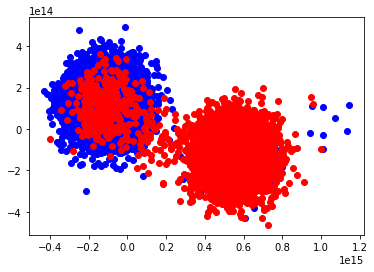

In [6]:
plt.scatter(X_train[y_train==0][:,0], X_train[y_train==0][:,1], color="blue", label="Estado 0")
plt.scatter(X_train[y_train==1][:,0], X_train[y_train==1][:,1], color="red", label="Estado 1")

In [7]:
from sklearn.preprocessing import RobustScaler
transformer = RobustScaler(quantile_range=(0.25,0.75)).fit(X)
X = transformer.transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, shuffle = False)

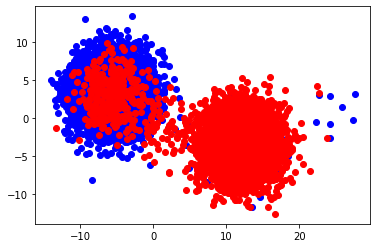

In [8]:
plt.scatter(X_train[y_train==0][:,0], X_train[y_train==0][:,1], color="blue", label="Estado 0")
plt.scatter(X_train[y_train==1][:,0], X_train[y_train==1][:,1], color="red", label="Estado 1")

In [9]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

parameters = {'max_depth':[i for i in range(1,50)]}
dtc = DecisionTreeClassifier()
clf = GridSearchCV(dtc, parameters)
clf.fit(X_train,y_train)
print(clf.best_params_)

{'max_depth': 2}


In [12]:
depth = clf.best_params_['max_depth']
clf = DecisionTreeClassifier(max_depth=depth, random_state=0)
clf.fit(X_train, y_train)
print('Score is: ',clf.score(X_test,y_test))

Score is:  0.9542310821806347


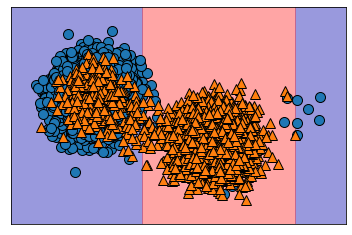

In [14]:
import mglearn
mglearn.plots.plot_2d_separator(clf,X_train,fill=True,alpha=.4)
mglearn.discrete_scatter(X_train[:,0],X_train[:,1],y_train)

0.95135498046875


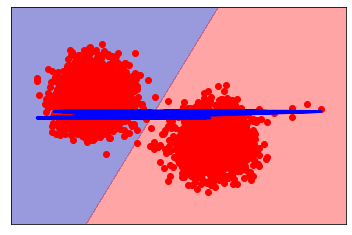

In [16]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
print(lr.score(X,y))
mglearn.plots.plot_2d_separator(lr,X_train,fill=True,alpha=.4)
plt.scatter(X_test[:,0], X_test[:,1], color='red')
plt.plot(X_test, y_pred, color='blue', linewidth=3)
plt.show()

In [11]:
h=.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
print(x_min)
print(y_min)
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

-429178928863642.6
-464020522296935.4


MemoryError: Unable to allocate 559. PiB for an array with shape (78726759259832416,) and data type float64

In [5]:
from sklearn.svm import SVC
svc = SVC(C=0.3,gamma=50)
svc.fit(X_train, y_train)
svc.score(X_test, y_test)

0.4932644110275689

In [6]:
y_pred = svc.predict(X_test)
z = svc.decision_function()

TypeError: decision_function() missing 1 required positional argument: 'X'

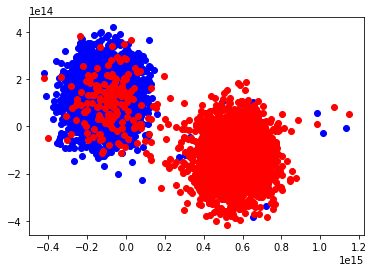

In [17]:
plt.scatter(X_test[y_test==0][:,0], X_test[y_test==0][:,1], color="blue", label="Estado 0")
plt.scatter(X_test[y_test==1][:,0], X_test[y_test==1][:,1], color="red", label="Estado 1")

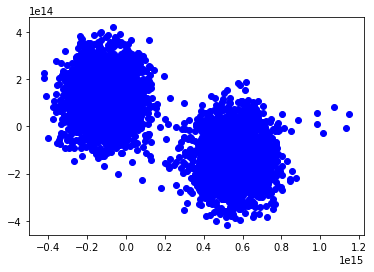

In [18]:
plt.scatter(X_test[y_pred==0][:,0], X_test[y_pred==0][:,1], color="blue", label="Estado 0")
plt.scatter(X_test[y_pred==1][:,0], X_test[y_pred==1][:,1], color="red", label="Estado 1")

In [21]:
print(y_pred)
print(1. in y_pred)

[0. 0. 0. ... 0. 0. 0.]
False


In [ ]:
dtc = DecisionTreeClassifier(max_depth=3)
dtc.fit(X_train,y_train)
dtc.score(X_test,y_test)